In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get the position of the Sun

il y a une librairie : PySolar !

http://pysolar.org/  
http://docs.pysolar.org/en/latest/

     pip install pysolar


Rq: voir aussi une app js en ligne: http://suncalc.net/ 

In [10]:
map_coords = ( 45.166672, 5.71667 ) 

In [11]:
import pysolar.solar as solar
import datetime as dt

In [70]:
d = dt.datetime.now()
d = dt.datetime(2017, 6, 20, 13, 30, 0, 130320)

In [71]:
solar.get_altitude( *map_coords, d)

/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


68.1997458366544

In [72]:
solar.get_azimuth(*map_coords, d)

/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


-354.6181910681082

In [157]:
Alt = [ solar.get_altitude(*map_coords, dt.datetime(2017, 12, 21, h, 0, 0, 0)) for h in range(0, 24) ]
Az = [ solar.get_azimuth(*map_coords, dt.datetime(2017, 12, 21, h, 0, 0, 0)) for h in range(0, 24) ]

/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


In [158]:
Az = np.array( Az )

Az[ Az < -180 ] = Az[ Az < -180 ]+360

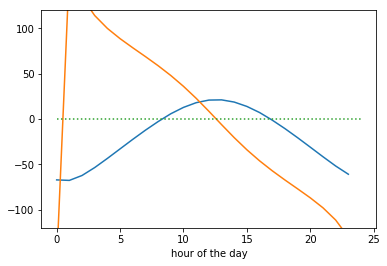

In [159]:
plt.plot( Alt )
plt.plot( Az )
plt.plot([0, 24], [0, 0], ':'); plt.ylim([-120, 120]); plt.xlabel('hour of the day');

In [33]:
import pysolar.radiation as radiation

In [66]:
radiation.get_radiation_direct( d, 65 )   # W/m2

864.9821032273021

**Remarque:** Le flux solaire au dessus de l'atmosphère est de F = 1 360,8  W/m2
    
https://fr.wikipedia.org/wiki/Constante_solaire

## Projection sur une surface inclinée 
http://www.a-ghadimi.com/files/Courses/Renewable%20Energy/REN_Book.pdf

page 414

In [177]:
import math
import pysolar.radiation as radiation
import pysolar.solar as solar
import datetime as dt

In [309]:
def get_radiation_direct(d, alt):
    if alt>0:
        return radiation.get_radiation_direct( d, alt )   # W/m2
    else:
        return 0
    
def get_flux_surface( coords, date, sigma, phi_C ):
    # Surface orientation 
    # sigma : deg, vertical angle of the surface, ref. to the horizontal
    # phi_C : deg, azimuth, relative to south, with positive values in the southeast direction and negative values in
    # the southwest
    
    # Sun position
    phi_S_deg = solar.get_azimuth( *coords, date ) # deg, azimuth of the sun,relative to south
    beta_deg = solar.get_altitude( *coords, date ) # deg, altitude angle of the sun
    
    I0 = get_radiation_direct( d, beta_deg )   # W/m2
    
    beta = beta_deg*math.pi/180  # rad
    phi_S = phi_S_deg*math.pi/180  #rad
    sigma = sigma*math.pi/180
    phi_C = phi_C*math.pi/180
    
    cosTheta = math.cos(beta)*math.cos( phi_S - phi_C )*math.sin( sigma ) + math.cos( sigma )*math.sin( beta )
    
    if cosTheta >0 :
        Isurf = I0*cosTheta   # flux projeté, W/m2
    else:
        Isurf = 0  # mais diffuse... 
        
    return Isurf

def get_flux_total( coords, date ):
    # Sun position
    beta_deg = solar.get_altitude( *coords, date ) # deg, altitude angle of the sun
    
    I0 = get_radiation_direct( d, beta_deg )   # W/m2
        
    return I0

In [260]:
get_radiation_direct( d, -4 )

0

In [310]:
d = dt.datetime(2017, 6, 22, 11, 0, 0, 0)
sigma = 37
phi_C = 50

F = get_flux_surface( map_coords, d, sigma, phi_C )
print( F )


814.1725142384576


/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


In [317]:
import pandas as pd

In [379]:
start =  dt.datetime(2017, 6, 22, 0, 0, 0, 0)
end =  dt.datetime(2017, 6, 22, 23, 59, 0, 0)

d_range = pd.date_range( start=start, end=end, freq='10min' )

In [380]:
F_tot = [ get_flux_total(map_coords, d ) for d in d_range ]
F_est = [ get_flux_surface(map_coords, d, sigma, phi_C ) for  d in d_range ]
F_ouest = [ get_flux_surface(map_coords, d, sigma, phi_C+180 ) for d in d_range ]
F_sud = [ get_flux_surface(map_coords, d, 90, phi_C-90 ) for d in d_range ]

/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


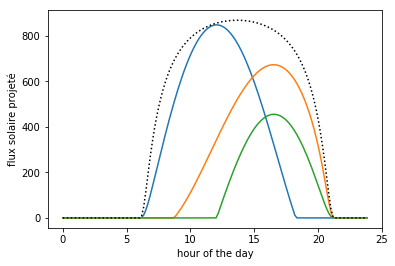

In [381]:
x = d_range.hour + d_range.minute/60

plt.plot( x, F_est )
plt.plot( x, F_ouest )
plt.plot( x, F_sud )
plt.plot( x, F_tot, 'k:' )
plt.xlabel('hour of the day');
plt.ylabel('flux solaire projeté');

In [378]:
d_range.hour + d_range.minute/60

Float64Index([           0.0, 0.166666666667, 0.333333333333,            0.5,
              0.666666666667, 0.833333333333,            1.0,  1.16666666667,
               1.33333333333,            1.5,
              ...
               22.3333333333,           22.5,  22.6666666667,  22.8333333333,
                        23.0,  23.1666666667,  23.3333333333,           23.5,
               23.6666666667,  23.8333333333],
             dtype='float64', length=144)

In [302]:
# Sun position
phi_S = solar.get_azimuth( *map_coords, d ) # deg, azimuth of the sun,relative to south
beta = solar.get_altitude( *map_coords, d ) # deg, altitude angle of the sun

I0 = radiation.get_radiation_direct( d, 65 )   # W/m2

cosTheta = math.cos(beta)*math.cos( phi_S - phi_C )*math.sin( sigma ) + math.cos( sigma )*math.sin( beta )

Isurf = I0*cosTheta   # flux projeté, W/m2

/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


In [188]:
cosTheta

-0.6379554981070448